In [1]:
# Example code

In [507]:
import qcomplexity as qc
import jax
import jax.numpy as jnp
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp, solve_ivp
from scipy.optimize import minimize
import numpy as np
from scipy.optimize import fsolve

np.set_printoptions(linewidth=100000)

In [508]:
inertia = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 0.1, 0.0],
    [0.0, 0.0, 0.1]
])

metric = jax.jit(qc.numerical_metric(inertia, qc.ham_fn)) # Metric tensor
christoffel_symbols = jax.jit(qc.numerical_christoffel_symbols(metric)) # Christoffel symbols

In [509]:
# The right-hand side of the geodesic differential equation
diff_fn = lambda *args : jnp.real(qc.diff_fn(christoffel_symbols)(*args))

In [605]:
init = jnp.array([0.0, 0.0, 0.0], dtype=complex)
fin = jnp.array([0.0, 0.3816, 0.4387], dtype=complex) # Boundary condition

In [606]:
jit_diff = jax.jit(diff_fn)
solver = qc.solve_geodesic_ivp(jit_diff, 50)

In [607]:
path_solver = qc.solve_geodesic_path(jit_diff, 50)

In [608]:
def complexity(fin, v_guess):
    cost = lambda v : np.real(solver(v) - fin)
    good = fsolve(cost, v_guess, full_output=True)
    good_v = good[0]
    
    print(good)
    
    x, v = path_solver(good_v)
    return qc.length(metric, x, v, 1/50), good[1]['fvec']

In [617]:
y = []
v_guess = jnp.array([0.0, 1.0, 1.0])

complexity(6.0 * fin, v_guess)

(array([0., 1., 1.]), {'nfev': 17, 'fjac': array([[ 0.01334739, -0.9974669 , -0.0698687 ],
       [ 0.76646276,  0.05508036, -0.63992264],
       [-0.64215004,  0.04501046, -0.76525641]]), 'r': array([-8.66206652e+10,  3.79465409e+13,  4.80007659e+13,  1.48785217e+03,  1.88135994e+03, -8.22560502e-01]), 'qtf': array([1.40037341, 0.97345038, 1.19100638]), 'fvec': array([-1.03728102e-08, -1.28960037e+00, -1.63220048e+00])}, 5, 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.')


(DeviceArray(0.45615792+2.0688287e-10j, dtype=complex64),
 array([-1.03728102e-08, -1.28960037e+00, -1.63220048e+00]))

In [610]:
print(y)

[]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


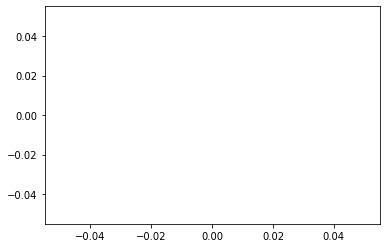

In [557]:
plt.plot(np.linspace(0, 5, 50), y)